This dataset is taken from Kaggle, and You can download it from this [Link](https://www.kaggle.com/competitions/porto-seguro-safe-driver-prediction)

# 1. EDA

## 1.x. Data Understanding

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import regex as re
import h5py
from sklearn.compose import ColumnTransformer
from pickle import dump, load
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from imblearn.combine import SMOTETomek 
from warnings import filterwarnings
filterwarnings('ignore')

In [63]:
insurance_claim = pd.read_csv('datasets/porto-seguro-safe-driver-prediction/train.csv')
insurance_claim.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
insurance_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [4]:
for col in insurance_claim.columns:
    if col != 'id':
        print('{} : {}\n'.format(col, insurance_claim[col].isna().sum()))
    else:
        print('The number of NaN values in each column\n\n')

The number of NaN values in each column


target : 0

ps_ind_01 : 0

ps_ind_02_cat : 0

ps_ind_03 : 0

ps_ind_04_cat : 0

ps_ind_05_cat : 0

ps_ind_06_bin : 0

ps_ind_07_bin : 0

ps_ind_08_bin : 0

ps_ind_09_bin : 0

ps_ind_10_bin : 0

ps_ind_11_bin : 0

ps_ind_12_bin : 0

ps_ind_13_bin : 0

ps_ind_14 : 0

ps_ind_15 : 0

ps_ind_16_bin : 0

ps_ind_17_bin : 0

ps_ind_18_bin : 0

ps_reg_01 : 0

ps_reg_02 : 0

ps_reg_03 : 0

ps_car_01_cat : 0

ps_car_02_cat : 0

ps_car_03_cat : 0

ps_car_04_cat : 0

ps_car_05_cat : 0

ps_car_06_cat : 0

ps_car_07_cat : 0

ps_car_08_cat : 0

ps_car_09_cat : 0

ps_car_10_cat : 0

ps_car_11_cat : 0

ps_car_11 : 0

ps_car_12 : 0

ps_car_13 : 0

ps_car_14 : 0

ps_car_15 : 0

ps_calc_01 : 0

ps_calc_02 : 0

ps_calc_03 : 0

ps_calc_04 : 0

ps_calc_05 : 0

ps_calc_06 : 0

ps_calc_07 : 0

ps_calc_08 : 0

ps_calc_09 : 0

ps_calc_10 : 0

ps_calc_11 : 0

ps_calc_12 : 0

ps_calc_13 : 0

ps_calc_14 : 0

ps_calc_15_bin : 0

ps_calc_16_bin : 0

ps_calc_17_bin : 0

ps_calc

In [5]:
insurance_claim.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
insurance_claim.groupby('target')['id'].count()

target
0    573518
1     21694
Name: id, dtype: int64

## 1.xx. Data Manipulation

In [100]:
X = insurance_claim.iloc[:, 2:]
y = insurance_claim.target

In [101]:
def get_cat_col_i(df):
    cat_patterns = re.compile('^ps_(car|ind)_\d{2}_cat$') # ps_car_01_cat, ps_ind_04_cat
    cat_cols_i = [df.columns.tolist().index(col) for col in df.columns if cat_patterns.match(col)]
    return cat_cols_i

In [9]:
get_cat_col_i(X)

[1, 3, 4, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]

In [10]:
numeric_cols_i = [i for i in range(len(X.columns)) if i not in get_cat_col_i(X)]

In [11]:
numeric_df = X.iloc[:, numeric_cols_i]

In [12]:
numeric_df.shape[1]

43

## 1.xxx. Correlation Analysis

In [13]:
numeric_df.corr()

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
ps_ind_01,1.000000,0.223408,-0.277458,0.005700,0.188583,0.162800,0.001847,-0.016727,-0.023406,-0.008776,...,-0.001263,0.001521,0.000199,-0.000891,-0.000397,-0.000012,-0.000868,-0.001504,-0.000162,-0.001464
ps_ind_03,0.223408,1.000000,-0.045158,-0.060368,0.014037,0.111306,0.006865,-0.003986,0.001698,0.003929,...,-0.002716,-0.002352,0.000133,0.000205,0.000134,-0.000744,0.000158,-0.000218,-0.000882,-0.003709
ps_ind_06_bin,-0.277458,-0.045158,1.000000,-0.474009,-0.356838,-0.384345,-0.008978,-0.005229,-0.017499,-0.008390,...,0.000822,0.001347,-0.001301,0.000304,0.002088,-0.000381,-0.000001,-0.000759,0.002791,0.000203
ps_ind_07_bin,0.005700,-0.060368,-0.474009,1.000000,-0.260438,-0.280513,0.010740,0.010119,0.036619,0.012125,...,-0.000448,-0.001044,0.000541,0.001666,0.000575,0.001220,-0.000517,0.000181,-0.001361,-0.000961
ps_ind_08_bin,0.188583,0.014037,-0.356838,-0.260438,1.000000,-0.211173,0.006489,0.010041,0.012254,0.007898,...,-0.000632,-0.001241,-0.000432,-0.001959,-0.002782,-0.002048,-0.000579,-0.000068,-0.000919,0.000995
ps_ind_09_bin,0.162800,0.111306,-0.384345,-0.280513,-0.211173,1.000000,-0.006973,-0.014372,-0.030858,-0.010612,...,0.000072,0.000664,0.001439,-0.000389,-0.000621,0.001059,0.001135,0.000815,-0.001103,-0.000123
ps_ind_10_bin,0.001847,0.006865,-0.008978,0.010740,0.006489,-0.006973,1.000000,0.064837,0.097998,0.081415,...,-0.002349,0.001367,0.001969,0.000232,-0.003233,0.001012,0.000345,0.000240,0.001555,-0.003390
ps_ind_11_bin,-0.016727,-0.003986,-0.005229,0.010119,0.010041,-0.014372,0.064837,1.000000,0.250076,0.179432,...,0.000184,-0.000612,0.000304,-0.000786,-0.000659,0.001418,0.001064,-0.001102,-0.001241,0.000409
ps_ind_12_bin,-0.023406,0.001698,-0.017499,0.036619,0.012254,-0.030858,0.097998,0.250076,1.000000,0.151728,...,0.000129,0.000813,0.000559,-0.000501,-0.001632,0.001754,0.001384,-0.001359,-0.001779,0.003166
ps_ind_13_bin,-0.008776,0.003929,-0.008390,0.012125,0.007898,-0.010612,0.081415,0.179432,0.151728,1.000000,...,-0.000186,-0.001418,-0.002125,0.000875,0.000492,0.001570,-0.002918,-0.000117,0.002079,-0.000981


## 1.xxxx. Data Visualization

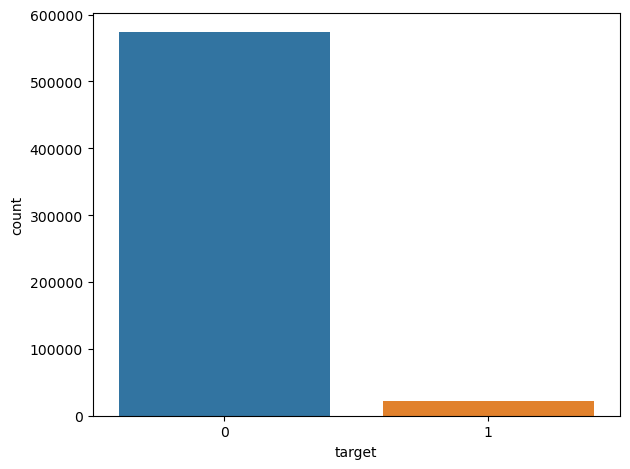

In [14]:
fig, ax = plt.subplots(1,1)
sns.countplot(data=insurance_claim, x='target')
plt.tight_layout()

# 2. Data Preprocessing

## 2.x. Data Balancing

In [ ]:
smt = SMOTETomek(random_state=0)
X_smt, y_smt = smt.fit_resample(X, y)

In [16]:
np.unique(y, return_counts=True)

(array([0, 1]), array([573518,  21694]))

In [17]:
np.unique(y_smt, return_counts=True)

(array([0, 1]), array([573518, 573518]))

In [18]:
h5_X = h5py.File('models/Insurance Claim Prediction next year/X.h5', mode='w')
h5_X.create_dataset(name='features', data=X_smt.values)
h5_X.close()

In [19]:
h5_y = h5py.File('models/Insurance Claim Prediction next year/y.h5', mode='w')
h5_y.create_dataset(name='targets', data=y_smt.values)
h5_y.close()

## 2.xx. Data Transformation

In [102]:
X_smt = np.array(h5py.File(name='models/Insurance Claim Prediction next year/X.h5', mode='r')['features'])
y_smt = np.array(h5py.File(name='models/Insurance Claim Prediction next year/y.h5', mode='r')['targets'])

In [103]:
insurance_claim_test = pd.read_csv('datasets/porto-seguro-safe-driver-prediction/test.csv')
insurance_claim_test.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [108]:
insurance_claim_test.shape

(892816, 58)

In [105]:
np.shape(X_smt)

(1147036, 57)

In [110]:
X_smt = np.concatenate([X_smt, np.asarray(insurance_claim_test.iloc[:, 1:])], axis=0)

In [119]:
y_smt = np.concatenate([y_smt, np.array([np.nan for i in range(892816)])], axis=0)

In [111]:
mms = MinMaxScaler(feature_range=(0, 1))
X_smt = mms.fit_transform(X_smt)

In [112]:
np.shape(X_smt)

(2039852, 57)

In [120]:
y_smt.shape

(2039852,)

In [113]:
with open('models/Insurance Claim Prediction next year/mms.algo', 'wb') as f:
    dump(mms, f)
    f.close()    

In [ ]:
cat_df = X.iloc[:, get_cat_col_i(X)]
count = 0
for col in cat_df.columns:
    for num in cat_df[col].unique():
        count += 1

In [61]:
count

184

In [114]:
ct = ColumnTransformer([('cat', OneHotEncoder(), get_cat_col_i(X))], remainder='passthrough')
X_smt = ct.fit_transform(X_smt)

In [115]:
X_smt

<2039852x228 sparse matrix of type '<class 'numpy.float64'>'
	with 83484690 stored elements in Compressed Sparse Row format>

In [116]:
with open('models/Insurance Claim Prediction next year/ct.algo', 'wb') as f:
    dump(ct, f)
    f.close()

# 3. Data Modeling

In [122]:
features_train, features_test = X_smt[:1147036, :], X_smt[1147036:, :]
labels_train, labels_test = y_smt[:1147036], y_smt[1147036:]

In [123]:
X_train, X_test, y_train, y_test = train_test_split(features_train, labels_train, random_state=0)

In [30]:
cboost_clf = CatBoostClassifier(n_estimators=1000, max_depth=5, eta=.1, subsample=1.0, colsample_bylevel=.8,
                               save_snapshot=True, snapshot_file='insurance_claim', snapshot_interval=10,
                               eval_metric='AUC', random_state=0, verbose=10)

In [31]:
cboost_clf.fit(X_train, y_train, cat_features=None, eval_set=(X_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8212107	best: 0.8212107 (0)	total: 274ms	remaining: 4m 33s
10:	test: 0.9425951	best: 0.9425951 (10)	total: 2.43s	remaining: 3m 38s
20:	test: 0.9738654	best: 0.9738654 (20)	total: 4.54s	remaining: 3m 31s
30:	test: 0.9812717	best: 0.9812717 (30)	total: 6.78s	remaining: 3m 31s
40:	test: 0.9824880	best: 0.9824880 (40)	total: 9.01s	remaining: 3m 30s
50:	test: 0.9827031	best: 0.9827031 (50)	total: 11.7s	remaining: 3m 37s
60:	test: 0.9829638	best: 0.9829638 (60)	total: 13.8s	remaining: 3m 32s
70:	test: 0.9831449	best: 0.9831455 (68)	total: 16s	remaining: 3m 29s
80:	test: 0.9833742	best: 0.9833742 (80)	total: 18.2s	remaining: 3m 26s
90:	test: 0.9835985	best: 0.9835985 (90)	total: 20.2s	remaining: 3m 21s
100:	test: 0.9838051	best: 0.9838051 (100)	total: 22.5s	remaining: 3m 20s
110:	test: 0.9839662	best: 0.9839662 (110)	total: 24.6s	remaining: 3m 16s
120:	test: 0.9841132	best: 0.9841132 (120)	total: 26.7s	remaining: 3m 13s
130:	test: 0.9842692	best: 0.9842692 (130)	total: 28.7s	remain

# 4. Data Evaluation

In [32]:
predicted = cboost_clf.predict(X_test)

In [33]:
print('Accuracy Mean (Training) : {}'.format(cboost_clf.score(X_train, y_train)))
print('Accuracy Mean (Test) : {}'.format(cboost_clf.score(X_train, y_train)))

Accuracy Mean (Training) : 0.9810537768648935
Accuracy Mean (Test) : 0.9810537768648935


In [34]:
print(classification_report(y_true=y_test, y_pred=predicted))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143181
           1       1.00      0.96      0.98    143578

    accuracy                           0.98    286759
   macro avg       0.98      0.98      0.98    286759
weighted avg       0.98      0.98      0.98    286759



In [35]:
print(confusion_matrix(y_true=y_test, y_pred=predicted))

[[143175      6]
 [  5463 138115]]


## 5. Creating the Final Model

In [128]:
cboost_clf = CatBoostClassifier(n_estimators=1000, max_depth=5, eta=.1, subsample=1.0, colsample_bylevel=.8,
                               save_snapshot=True, snapshot_file='insurance_claim_fina', snapshot_interval=10,
                               eval_metric='AUC', random_state=0, verbose=10)

In [129]:
cboost_clf.fit(features_train, labels_train, cat_features=None, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	total: 268ms	remaining: 4m 27s
10:	total: 2.85s	remaining: 4m 16s
20:	total: 5.36s	remaining: 4m 10s
30:	total: 7.92s	remaining: 4m 7s
40:	total: 10.7s	remaining: 4m 10s
50:	total: 13.8s	remaining: 4m 17s
60:	total: 16.3s	remaining: 4m 10s
70:	total: 18.8s	remaining: 4m 6s
80:	total: 21.5s	remaining: 4m 3s
90:	total: 24s	remaining: 3m 59s
100:	total: 26.4s	remaining: 3m 55s
110:	total: 28.9s	remaining: 3m 51s
120:	total: 31.5s	remaining: 3m 48s
130:	total: 34s	remaining: 3m 45s
140:	total: 36.4s	remaining: 3m 41s
150:	total: 38.7s	remaining: 3m 37s
160:	total: 41.3s	remaining: 3m 35s
170:	total: 44.3s	remaining: 3m 34s
180:	total: 46.9s	remaining: 3m 32s
190:	total: 49.4s	remaining: 3m 29s
200:	total: 51.9s	remaining: 3m 26s
210:	total: 54.3s	remaining: 3m 23s
220:	total: 56.8s	remaining: 3m 20s
230:	total: 59.2s	remaining: 3m 17s
240:	total: 1m 1s	remaining: 3m 14s
250:	total: 1m 4s	remaining: 3m 11s
260:	total: 1m 6s	remaining: 3m 8s
270:	total: 1m 8s	remaining: 3m 5s
280:	total: 

# 5. Freezing Model

In [38]:
with open('models/Insurance Claim Prediction next year/cboost_clf.cbm', 'wb') as f:
    dump(cboost_clf, f)
    f.close()

# 6. Predicting the Probability of an instance belonging to the positive class 

In [161]:
labels_test = cboost_clf.predict_proba(features_test)

In [162]:
labels_test

array([[0.96164167, 0.03835833],
       [0.9730822 , 0.0269178 ],
       [0.96260329, 0.03739671],
       ...,
       [0.95641925, 0.04358075],
       [0.97495297, 0.02504703],
       [0.97367261, 0.02632739]])

In [164]:
positive_proba = labels_test[:, 1]
insurance_claim_test['target'] = positive_proba

In [167]:
insurance_claim_test[['id', 'target']].to_csv('datasets/porto-seguro-safe-driver-prediction/Insurance Claim Prediction next year.csv', index_label=False)